### GAIA Testing - Cluster Analysis/Identification Tutorial

In [60]:
#Required Importsa

import astropy.units as u
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.units import Quantity
from astroquery.gaia import Gaia

In [61]:
#Required Imports 2

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Suppress warnings. Comment this out if you wish to see the warning messages
import warnings
warnings.filterwarnings('ignore')

In [62]:
#Printing available Gaia table names:

from astroquery.gaia import Gaia
tables = Gaia.load_tables(only_names=True)
for table in (tables):
    print(table.get_qualified_name())

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]
external.external.apassdr9
external.external.gaiadr2_geometric_distance
external.external.gaiaedr3_distance
external.external.galex_ais
external.external.ravedr5_com
external.external.ravedr5_dr5
external.external.ravedr5_gra
external.external.ravedr5_on
external.external.sdssdr13_photoprimary
external.external.skymapperdr1_master
external.external.skymapperdr2_master
external.external.tmass_xsc
public.public.hipparcos
public.public.hipparcos_newreduction
public.public.hubble_sc
public.public.igsl_source
public.public.igsl_source_catalog_ids
public.public.tycho2
public.public.dual
tap_config.tap_config.coord_sys
tap_config.tap_config.properties
tap_schema.tap_schema.columns
tap_schema.tap_schema.key_columns
tap_schema.tap_schema.keys
tap_schema.tap_schema.schemas
tap_schema.tap_schema.tables
gaiaedr3.gaiaedr3.gaia_source
gaiaedr3.gaiaedr3.ag

In [63]:
#Retrieving GAIA stellar data, centered on the Pleides (coordinates: 56.75, +24.1167), with a search radius 
#of 2 degrees and save the results to a file

job = Gaia.launch_job_async("SELECT * \
FROM gaiadr1.gaia_source \
WHERE CONTAINS(POINT('ICRS',gaiadr1.gaia_source.ra,gaiadr1.gaia_source.dec),CIRCLE('ICRS',56.75,24.1167,2))=1;" \
, dump_to_file=True)
print (job)

Jobid: 1612314181222O
Phase: COMPLETED
Owner: None
Output file: async_20210202200301.vot
Results: None


In [64]:
#Inspecting output table and number of rows
#Should be ~10^5 rows

r = job.get_results()
print (r['source_id'])

    source_id    
-----------------
66926207631181184
66818318054203520
66917823855519360
66830859358837888
66809423175240448
66944761890240000
66980191076373760
66781621852927232
66827805636652928
66947545031024640
              ...
66649989694512256
65666785781176576
64014803920669568
64137880504644992
66542306274948224
64005909043397504
66689881351473664
66436615718993792
65645757620918912
66718434293042560
64103559419447296
Length = 98538 rows


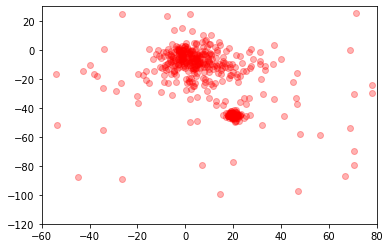

In [65]:
# Plotting proper motions in RA/DEC with Pleides data

plt.scatter(r['pmra'], r['pmdec'], color='r', alpha=0.3)
plt.xlim(-60,80)
plt.ylim(-120,30)
plt.show()

In [66]:
# Query from same location - but now with higher quality data

job2 = Gaia.launch_job_async("SELECT * \
FROM gaiadr1.gaia_source \
WHERE CONTAINS(POINT('ICRS',gaiadr1.gaia_source.ra,gaiadr1.gaia_source.dec),CIRCLE('ICRS',56.75,24.1167,2))=1 \
AND abs(pmra_error/pmra)<0.10 \
AND abs(pmdec_error/pmdec)<0.10 \
AND pmra IS NOT NULL AND abs(pmra)>0 \
AND pmdec IS NOT NULL AND abs(pmdec)>0;", dump_to_file=True)

In [67]:
# Now a much smaller selection
j = job2.get_results()
print (j['source_id'])

    source_id    
-----------------
66623395256627712
66581957412169728
65614730777165824
64053561704835584
65828207832006400
66858862543722112
66863054431798272
66588520122169728
66657823714473856
66592437132341248
              ...
66912360656318208
66471215975411200
66729257611496704
64013704408496896
64013807487711360
66506331628024832
66715101399291392
66724447247218048
66610957031353856
66857281995760000
66570549979009280
Length = 218 rows


In [68]:
# Query from same location - but now with GAIA EDR3

job3 = Gaia.launch_job_async("SELECT * \
FROM gaiaedr3.gaia_source \
WHERE CONTAINS(POINT('ICRS',gaiaedr3.gaia_source.ra,gaiaedr3.gaia_source.dec),CIRCLE('ICRS',56.75,24.1167,2))=1 \
AND abs(pmra_error/pmra)<0.10 \
AND abs(pmdec_error/pmdec)<0.10 \
AND pmra IS NOT NULL AND abs(pmra)>0 \
AND pmdec IS NOT NULL AND abs(pmdec)>0;", dump_to_file=True)

In [69]:
# Now a SIGNIFICANTLY larger selection than before
# Note that this is larger both because more stars were found, and because the errors are smaller.
# Most of the increase here is from stars located in GDR1, with errors that are now small enough
# to pass our requirements in the above query.

k = job3.get_results()
print (k['source_id'])

    source_id    
-----------------
66942670244424704
66942769025259264
66942803385001472
66942876402851328
66942910762588928
66943048201543936
66943078262923648
66943185640494080
66943185640494976
66943288719709952
              ...
70229351015864576
70229488454818688
70229694613246336
70229793396291072
70230313087377536
70230347448270848
70230622325020032
70230759765127040
70230759765127296
70230759765128320
70230759765128960
Length = 33081 rows


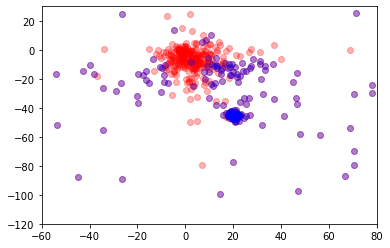

In [70]:
# job and job2 data overlayed on top of each other

plt.scatter(r['pmra'], r['pmdec'], color='r', alpha=0.3)
plt.scatter(j['pmra'], j['pmdec'], color='b', alpha=0.3)
plt.xlim(-60,80)
plt.ylim(-120,30)

plt.show()

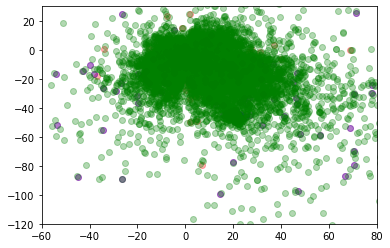

In [71]:
# job and job2 and job3 data overlayed on top of each other (Note not very useful)

plt.scatter(r['pmra'], r['pmdec'], color='r', alpha=0.3)
plt.scatter(j['pmra'], j['pmdec'], color='b', alpha=0.3)
plt.scatter(k['pmra'], k['pmdec'], color='g', alpha=0.3)
plt.xlim(-60,80)
plt.ylim(-120,30)

plt.show()

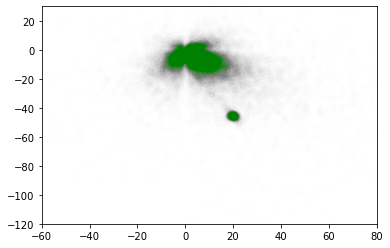

In [72]:
# Just the GAIA EDR3 data with the opacity turned down by a factor of 100

plt.scatter(k['pmra'], k['pmdec'], color='g', alpha=0.003)
plt.xlim(-60,80)
plt.ylim(-120,30)

plt.show()

In [73]:
# Identify candidate cluster stars

job4 = Gaia.launch_job_async("SELECT * \
FROM gaiaedr3.gaia_source \
WHERE CONTAINS(POINT('ICRS',gaiaedr3.gaia_source.ra,gaiaedr3.gaia_source.dec),CIRCLE('ICRS',56.75,24.1167,2))=1 \
AND abs(pmra_error/pmra)<0.10 \
AND abs(pmdec_error/pmdec)<0.10 \
AND pmra IS NOT NULL AND abs(pmra)>0 \
AND pmdec IS NOT NULL AND abs(pmdec)>0 \
AND pmra BETWEEN 15 AND 25 \
AND pmdec BETWEEN -55 AND -40;", dump_to_file=True)

In [74]:
# Looking at candidate m45 data

m45cluster = job4.get_results()
print (m45cluster['parallax'])

      parallax      
        mas         
--------------------
   3.464541606573777
  0.5609728756987002
   2.029750760264433
-0.15767717625329036
  2.7699711368565767
   8.126112789370953
   4.695622986161736
   7.656666795074176
   3.607389818287759
  3.3691197661049026
                 ...
   6.663989637210631
   6.566669588716607
  2.1924606779956957
   6.610957727992528
   8.784935218338338
   6.561916579801807
  1.7017501567229005
   3.490311502638451
    7.41282032449915
   6.423569055866071
Length = 1125 rows


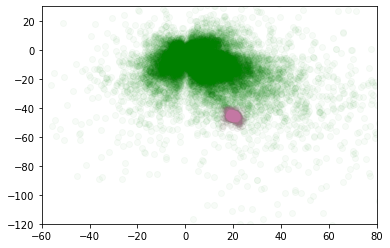

In [75]:
#Plotting candidate stars

plt.scatter(k['pmra'], k['pmdec'], color='g', alpha=0.03)
plt.scatter(m45cluster['pmra'], m45cluster['pmdec'], color='C6', alpha=0.03)
plt.xlim(-60,80)
plt.ylim(-120,30)

plt.show()

In [76]:
#Checking parallax distributions

avg_parallax = np.mean(m45cluster['parallax'])
stddev_parallax = np.std(m45cluster['parallax'])
print (avg_parallax, stddev_parallax)


7.142996446609205 1.2061496454378182


In [77]:
# We can also cross match to other databases like 2MASS
# Note: not sure how to convert to EDR3 yet. Throwing null errors at the moment.
#       Cross matched tables are likely data-release specific.

job5 = Gaia.launch_job_async("SELECT * \
FROM gaiadr1.gaia_source AS g, gaiadr1.tmass_best_neighbour AS tbest, gaiadr1.tmass_original_valid AS tmass \
WHERE g.source_id = tbest.source_id AND tbest.tmass_oid = tmass.tmass_oid \
AND CONTAINS(POINT('ICRS',g.ra,g.dec),CIRCLE('ICRS',56.75,24.1167,2))=1 \
AND abs(pmra_error/pmra)<0.10 \
AND abs(pmdec_error/pmdec)<0.10 \
AND pmra IS NOT NULL AND abs(pmra)>0 \
AND pmdec IS NOT NULL AND abs(pmdec)>0 \
AND pmra BETWEEN 15 AND 25 \
AND pmdec BETWEEN -55 AND -40;", dump_to_file=False)

INFO: Query finished. [astroquery.utils.tap.core]


In [78]:
# 2MASS data from above query

p = job5.get_results()
print (p['phot_g_mean_mag', 'j_m', 'h_m', 'ks_m'])

 phot_g_mean_mag    j_m    h_m   ks_m
       mag          mag    mag   mag 
------------------ ------ ----- -----
10.757800849005008  9.603 9.202 9.094
 6.073301943844488  5.968 6.051 5.976
10.643169127592188  9.535 9.219 9.137
  6.82750238785118  6.699 6.733 6.692
 10.15654586177056  9.117 8.868 8.758
 7.537147252150579   7.28  7.29 7.257
  8.13286526000272  7.588 7.528  7.47
 8.526811916775689  7.892 7.767 7.738
  9.02342350637215  8.236 8.033 8.002
 7.024616005401143  6.848  6.92 6.895
               ...    ...   ...   ...
10.511033521483427  9.477  9.14 9.072
11.597470392962894 10.261 9.835  9.73
10.591447284586406  9.531 9.192 9.123
10.325731863675678   9.35 9.092 8.996
   9.9103711452616  8.983 8.711 8.632
 9.333511794582734  8.533 8.329 8.282
 8.112675586895094  7.673 7.599 7.576
 6.327547776037669  6.228 6.248 6.257
 8.187849825277272  7.526 7.393 7.352
11.149659997470195  9.949 9.564 9.439
Length = 106 rows
